In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/sample_data/employees.csv')

In [ ]:
data.head(20)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
5,0.10,0.77,6,247,4,0,1,0,7,1
6,0.92,0.85,5,259,5,0,1,0,7,1
7,0.42,0.53,2,142,3,0,1,0,7,1
8,0.45,0.54,2,135,3,0,1,0,7,1
9,0.11,0.81,6,305,4,0,1,0,7,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.shape

(14999, 10)

In [ ]:
data.left.value_counts()

,count
left,
0,11428
1,3571


<Axes: xlabel='left'>

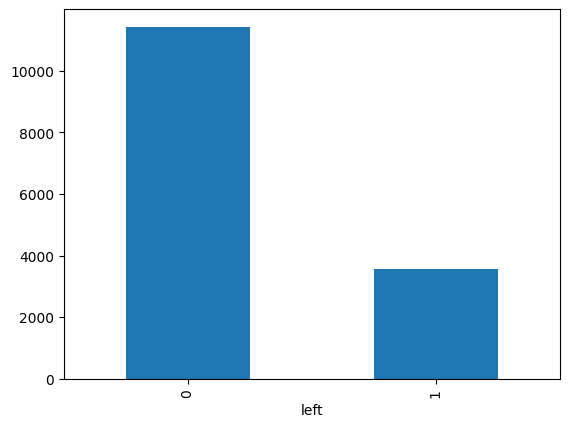

In [ ]:
data.left.value_counts().plot(kind="bar")

In [ ]:
data.isna().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [ ]:
data.duplicated().sum()

3008

In [ ]:
data=data.drop_duplicates(keep="first")

In [ ]:
data.shape

(11991, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data["dept"]=le.fit_transform(data['dept'])
data['salary']=le.fit_transform(data['salary'])

In [ ]:
data.dept.value_counts()

,count
dept,
7,3239
9,2244
8,1821
0,976
1,694
6,686
5,673
2,621
3,601


In [ ]:
data.salary.value_counts()

,count
salary,
1,5740
2,5261
0,990


In [ ]:
data.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.006941,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.004309,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
dept,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


<Axes: >

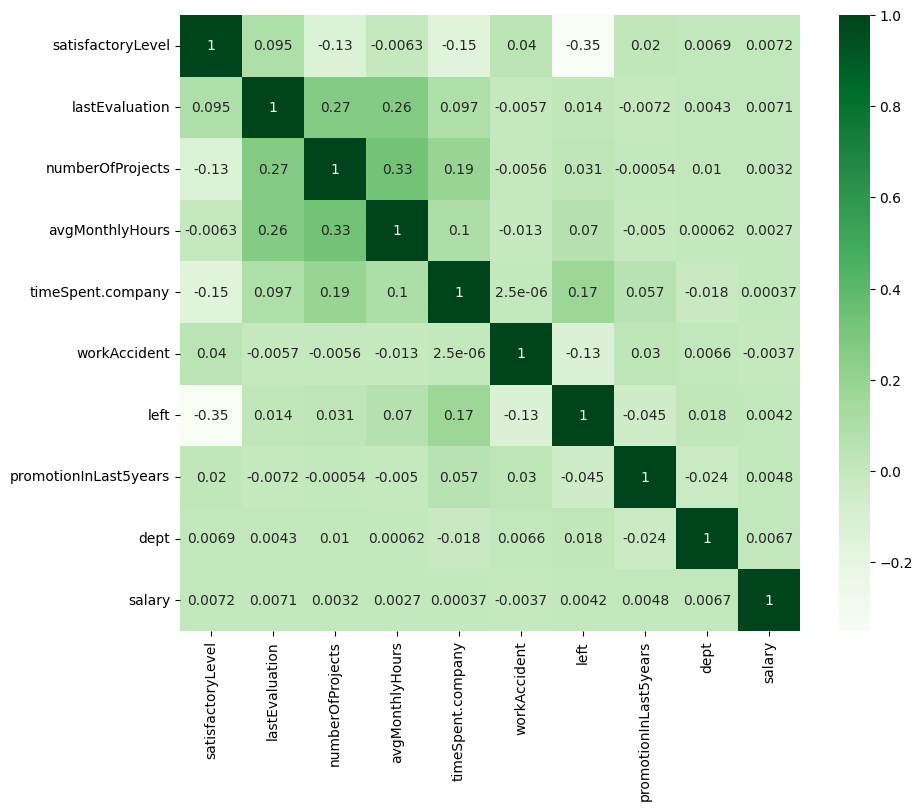

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="Greens")